# Law of large numbers

As the number of experiments repetitions increases, the average of the sample means better approximates the population mean.

$$\lim_{n \to \infty} P(|\bar{x} - \mu| > \epsilon) = 0$$

Epsilon is arbitrarily small number greater than zero, x_bar is mean of some random sample, $\mu$ is the mean of total sample.

The probability of our sample mean (the divergence of the sample mean) to the population mean is larger than some arbitrarily small number (epsilon), goes to zero, as the number increases to infinity.

### Why are we taking multiple samples, n increases to infinity?

Any one sample (or any one experiment) is sensitive to sampling variability, noise, and other sources of non-systematic variation.

This means that one sample of one experiment is unlikely to provide a good estimate of the true population mean.

By sampling many ties can provide an accurate measure of the true population mean.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# simulation parameters
population_size = 2.3e5 # 230000
sample_size = 50
number_of_samples = 500

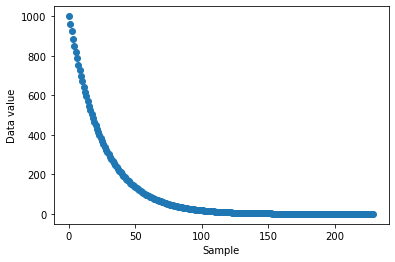

In [61]:
# generate the population of numbers
population = 1 / np.logspace(np.log10(0.001),np.log10(10), int(population_size))

true_mean = np.mean(population)

# plot only 1th thousand number
skip = int(1e3)
# numbers will be on y-axis, and index of array will be on x-axis
plt.plot(population[::skip], 'o')

plt.xlabel("Sample")
plt.ylabel("Data value")
plt.show()

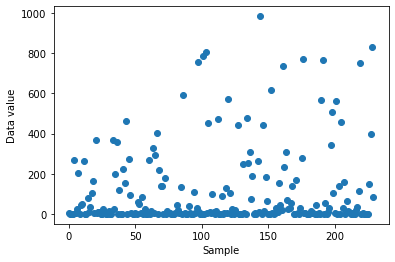

In [62]:
# shuffle the data
# population is changed in-place
np.random.shuffle(population)

skip = int(1e3)

plt.plot(population[::skip], 'o')

plt.xlabel("Sample")
plt.ylabel("Data value")
plt.show()

#### Result of below graph

Sample means is sometimes very accurate, and sometimes is goes far away from both sides in graph.

The graph is telling us that individual samples are not reliable, because variability is too high. Law of large numbers tells us that the average of this whole cloud is really really close to the actual mean.

The more of these samples we average together, the closer the true mean we are going to get.

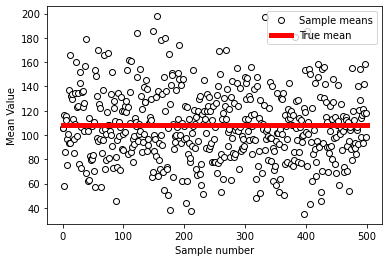

In [79]:
# selection 50 data points of and finding their average, and repeat the process again.

# get the sample_size random data points from data, if repeat is true (default in np.mean) same number can come up multiple times
sample_means = np.zeros(number_of_samples)


for experiment_i in range(number_of_samples):
    random_sample = np.random.choice(population, size=sample_size)
    sample_means[experiment_i] = np.mean(random_sample)


# sample means on y-axis, and array index on x-axis
plt.plot(sample_means, 'ko', markerfacecolor="w", label="Sample means")
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r-', linewidth=5, label="True mean")


plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Mean Value")
plt.show()

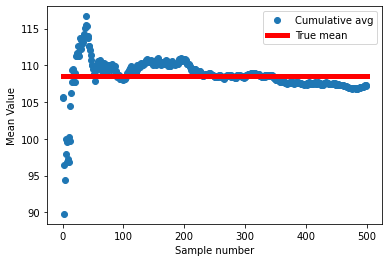

In [94]:
# cumulative average
cumulative_avg = np.zeros(number_of_samples)

for i in range(number_of_samples):
    # sample mean from beginning upto ith element
    # for the last element, there will be only one element
    cumulative_avg[i] = np.mean(sample_means[:i+1])


plt.plot(cumulative_avg, 'o', label="Cumulative avg")
# actual mean
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r-', linewidth=5, label="True mean")

plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Mean Value")
plt.show()

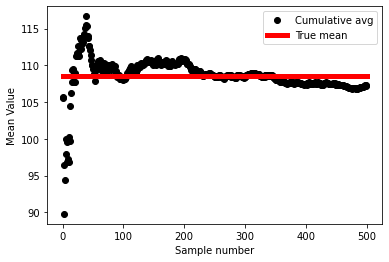

In [100]:
cumulative_avg = np.cumsum(sample_means) / np.arange(1, number_of_samples+1)


plt.plot(cumulative_avg, 'o', label="Cumulative avg")
# actual mean
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r-', linewidth=5, label="True mean")

plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Mean Value")
plt.show()

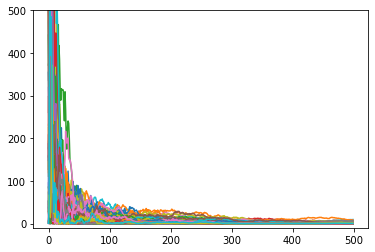

In [119]:
number_of_meta_samples = 100

sample_means = np.zeros(number_of_samples)
cum_avg = np.zeros((number_of_meta_samples, number_of_samples))
all_sample_means = np.zeros((number_of_meta_samples, number_of_samples))


for meta_i in range(number_of_meta_samples):
    for experiment_i in range(number_of_samples):
        random_sample = np.random.choice(population, size=sample_size)
        sample_means[experiment_i] = np.mean(random_sample)

        # now get the cumulative average divergencies
        temp = np.cumsum(sample_means) / np.arange(1, number_of_samples+1)
        # getting the divergence from the true population mean
        # add in the columns
        cum_avg[meta_i,:] = (temp-true_mean)**2

        # store the sample mean
        all_sample_means[meta_i,:] = sample_means


# averages are in the columns, but we need in the rows, so convert the columns into row, transpose it
plt.plot(cum_avg.T)
plt.ylim([-10,500])
plt.show()

## Central Limit Theorem

The law of large numbers is closely related to another important theorem in statistics, called central limit theorem.

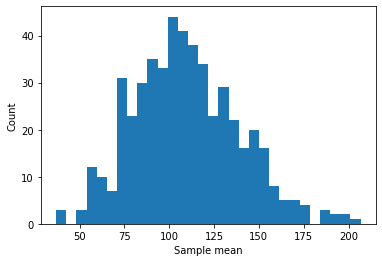

In [118]:
plt.hist(sample_means, bins=30)

plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

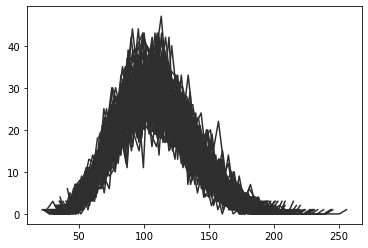

In [136]:
for i in range(number_of_meta_samples):
    y,x = np.histogram(all_sample_means[i,:], bins=40)
    # one col is 
    x = (x[1:] + x[:-1]) / 2
    plt.plot(x,y, color=[.18,.18,.18])

plt.show()